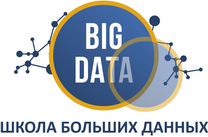

### Датасет продаж

In [1]:
import pandas as pd

In [2]:
# считываем данные из csv файла и выводим первые 5 строк
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# удалим ненужный столбец старых индексов
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
# выводим последние 5 строк
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


**Описание признаков**

*TV*: сколько потрачено долларов на рекламу одного вида продукта по TV

*Radio*: сколько потрачено долларов на рекламу одного вида продукта по радио

*Newspaper*: сколько потрачено долларов на рекламу одного вида продукта через газеты


**Таргет**

*Sales*: количество продаж определенного товара в сети магазинах в тысячах



#### Подготовка данных

In [5]:
# Выделяем датасет с фичами
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
# Выделяем таргет
y = df.Sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Строим модель линеейной регрессии

**Общий вид модели линейной регрессии**
$$
y = b_0 + b_1*x_1 + b_2*x_2 + ... + b_n*x_n.
$$

В нашем случае:
$$
y = b_0 + b_1*TV + b_2*Radio + b_3*Newspaper.
$$

In [7]:
# Отделяем данные для обучения и теста
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

#### Обучение и интерпретация модели

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [11]:
# Обучаем модель

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_norm, y_train)

LinearRegression()

In [12]:
# Интерпретируем модель
print(linreg.coef_)

[3.76419618 2.79230665 0.05597551]


#### Тестируем модель

In [13]:
y_pred = linreg.predict(X_test_norm)

In [14]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

1.4607567168117603


In [29]:
# как оценить полченный результат?

In [15]:
# построим baseline модель: каждому товару спрогнозируем среднее значение по всем товарам из обучающей выборки
y_pred_baseline = [y_train.mean()]*y_test.shape[0]

In [16]:
print(mean_absolute_error(y_test, y_pred_baseline))

4.9625


### Строим модель дерево решений

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtreg = DecisionTreeRegressor(max_depth = 3)

In [19]:
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
dtreg.feature_importances_

array([0.62786619, 0.35987005, 0.01226376])

In [21]:
y_pred_dt = dtreg.predict(X_test)

In [22]:
print(mean_absolute_error(y_test, y_pred_dt))

1.6855939761140177


In [23]:
from sklearn import tree
from matplotlib import pyplot as plt

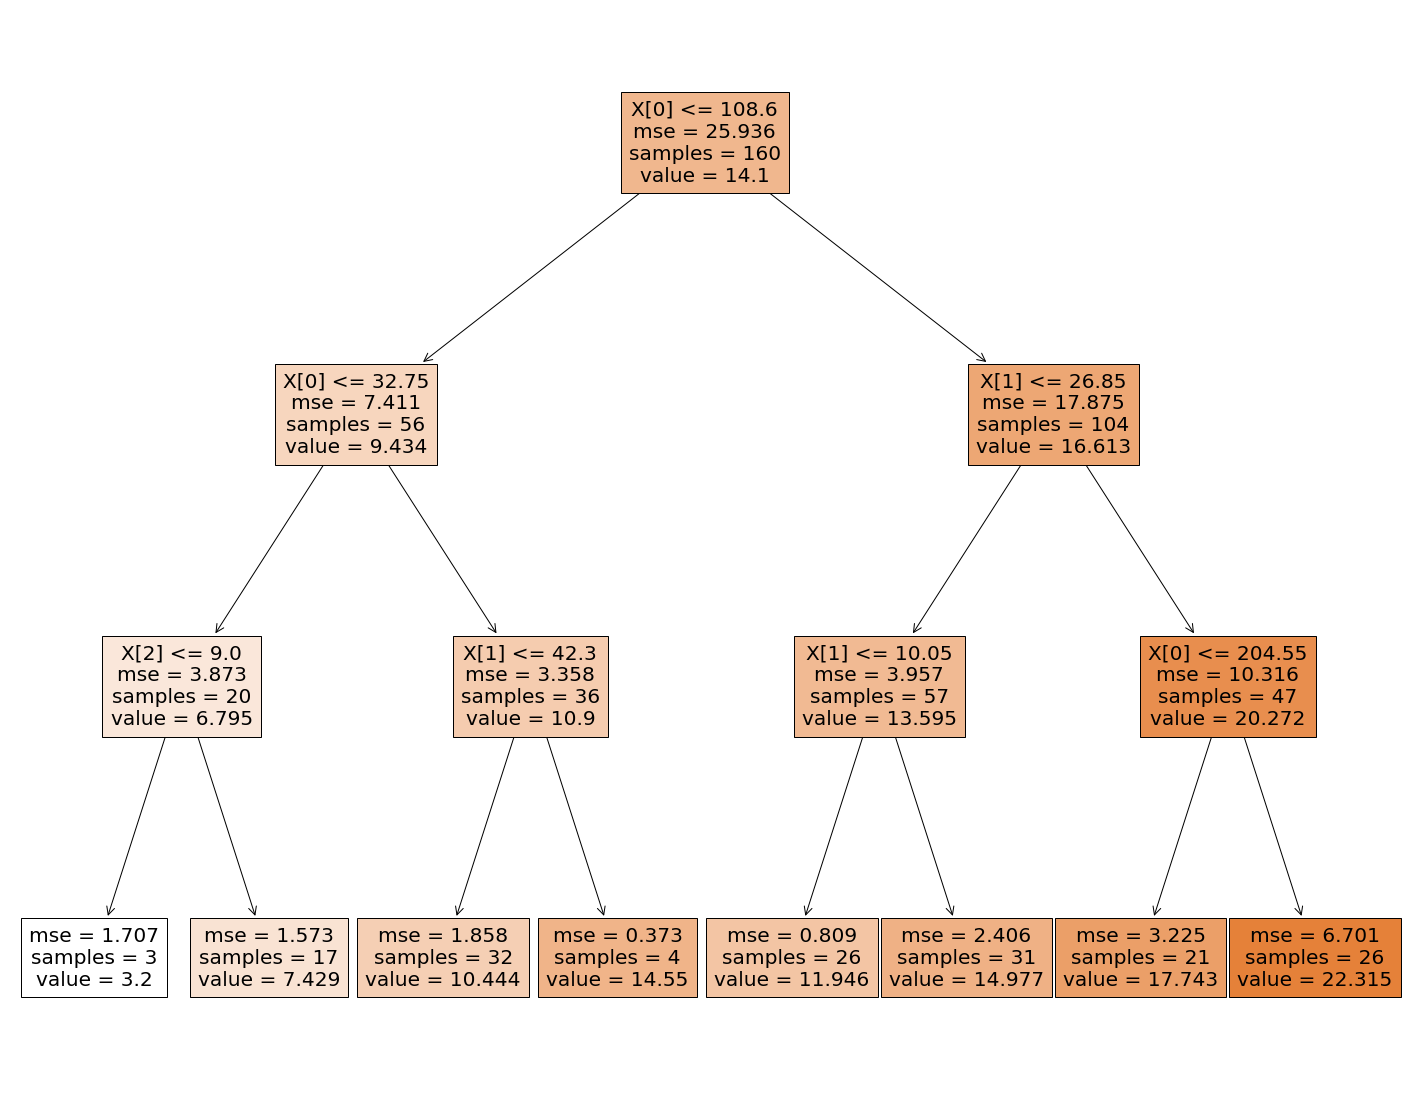

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtreg, 
                   filled=True)